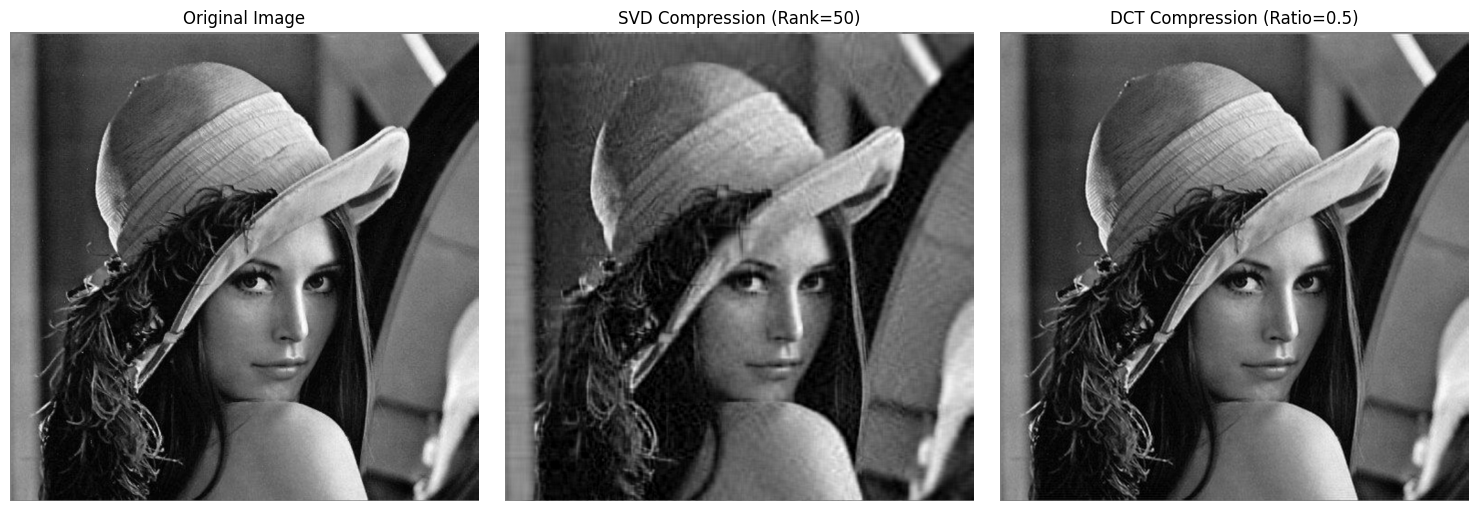

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def svd_compression(image, rank):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    compressed_image = np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), Vt[:rank, :]))
    return np.clip(compressed_image, 0, 255)  # Ensure pixel values remain valid

def dct_compression(image, compression_ratio):
    dct = cv2.dct(np.float32(image))  # Apply DCT
    rows, cols = dct.shape
    dct[int(rows * compression_ratio):, :] = 0  # Zero out lower frequency components
    dct[:, int(cols * compression_ratio):] = 0
    compressed_image = cv2.idct(dct)  # Apply Inverse DCT
    return np.clip(compressed_image, 0, 255)

def display_compressed_images(image_path, svd_rank=50, dct_ratio=0.5):
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    image_matrix = np.array(image)

    svd_compressed = svd_compression(image_matrix, svd_rank)
    dct_compressed = dct_compression(image_matrix, dct_ratio)

    # Display images
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image_matrix, cmap="gray")
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(svd_compressed, cmap="gray")
    axes[1].set_title(f"SVD Compression (Rank={svd_rank})")
    axes[1].axis("off")

    axes[2].imshow(dct_compressed, cmap="gray")
    axes[2].set_title(f"DCT Compression (Ratio={dct_ratio})")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
image_path = "/content/drive/MyDrive/Lena_Image.png"
display_compressed_images(image_path, svd_rank=50,dct_ratio=0.5)
